In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [37]:
df = pd.read_csv('/Users/kavinantonyar/Projects/Main Project/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')

In [38]:
df.shape

(175341, 45)

In [39]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [41]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [42]:
df.isnull().sum().sum()

np.int64(0)

In [43]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [44]:
df['attack_cat'].unique()
# df['label'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [45]:
# df = df.drop(columns=['id', 'label'])
df = df.drop(columns=['id'])

In [46]:
categorical_cols = ['proto', 'service', 'state']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [47]:
le_attack = LabelEncoder()
df['attack_cat'] = le_attack.fit_transform(df['attack_cat'])

In [48]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0


In [49]:
attack_class_mapping = dict(zip(le_attack.classes_, le_attack.transform(le_attack.classes_)))
for i in attack_class_mapping:
    print(f'{attack_class_mapping[i]}: {i}')

0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


1. BINARY CLASSIFICATION USING LABEL COLUMN [0, 1] = ['NORMAL', 'ATTACK']

In [64]:
X = df.drop(columns=['label', 'attack_cat'])
y = df['label']
selected_features = ['is_sm_ips_ports', 'ct_dst_sport_ltm', 'dload', 'sload', 'ct_dst_ltm', 'ct_state_ttl']
X = X[selected_features]

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(64, 32),  # Two hidden layers: 64 and 32 neurons
                    activation='relu',
                    solver='adam',
                    max_iter=100,  
                    random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Normal", "Attack"]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9303373349682056

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.80      0.88     11169
      Attack       0.91      0.99      0.95     23900

    accuracy                           0.93     35069
   macro avg       0.95      0.89      0.92     35069
weighted avg       0.93      0.93      0.93     35069


Confusion Matrix:
 [[ 8905  2264]
 [  179 23721]]


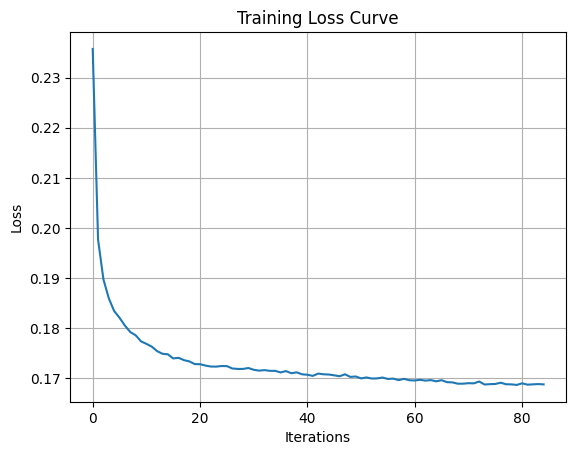

In [72]:
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X_scaled, y, cv=5, scoring='f1_macro')
print("F1 Macro CV scores:", scores)

/Users/kavinantonyar/Projects/Main Project/macos/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kavinantonyar/Projects/Main Project/macos/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Macro CV scores: [0.96913746 0.98515519 0.98314221 0.85594914 0.61647421]


/Users/kavinantonyar/Projects/Main Project/macos/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Attack"]))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9356981949870256

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.87      0.90     11169
      Attack       0.94      0.97      0.95     23900

    accuracy                           0.94     35069
   macro avg       0.93      0.92      0.92     35069
weighted avg       0.94      0.94      0.94     35069


Confusion Matrix:
[[ 9690  1479]
 [  776 23124]]
